## What is Cross Validation

Sometimes we get into this dilemma of which machine learning model should i use to solve my problem. 
for example we worked on this iris flower dataset problem now you can classify those iris flowers using svm, random forest, logistic regression, decision tree which model out of these is the best? 
* Cross validation is a technique which allows you to answer the exact same question it basically allows you to evaluate a model performance when you are looking at machine learning models such as classifying emails as spam or not spam.

Option to train and test the model :-
   1. Use all available dataset to train and use the same dataset to test
   2. Split the dataset for training and testing.
   3. K Fold Cross Validation

### K Fold Cross Validation :-
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

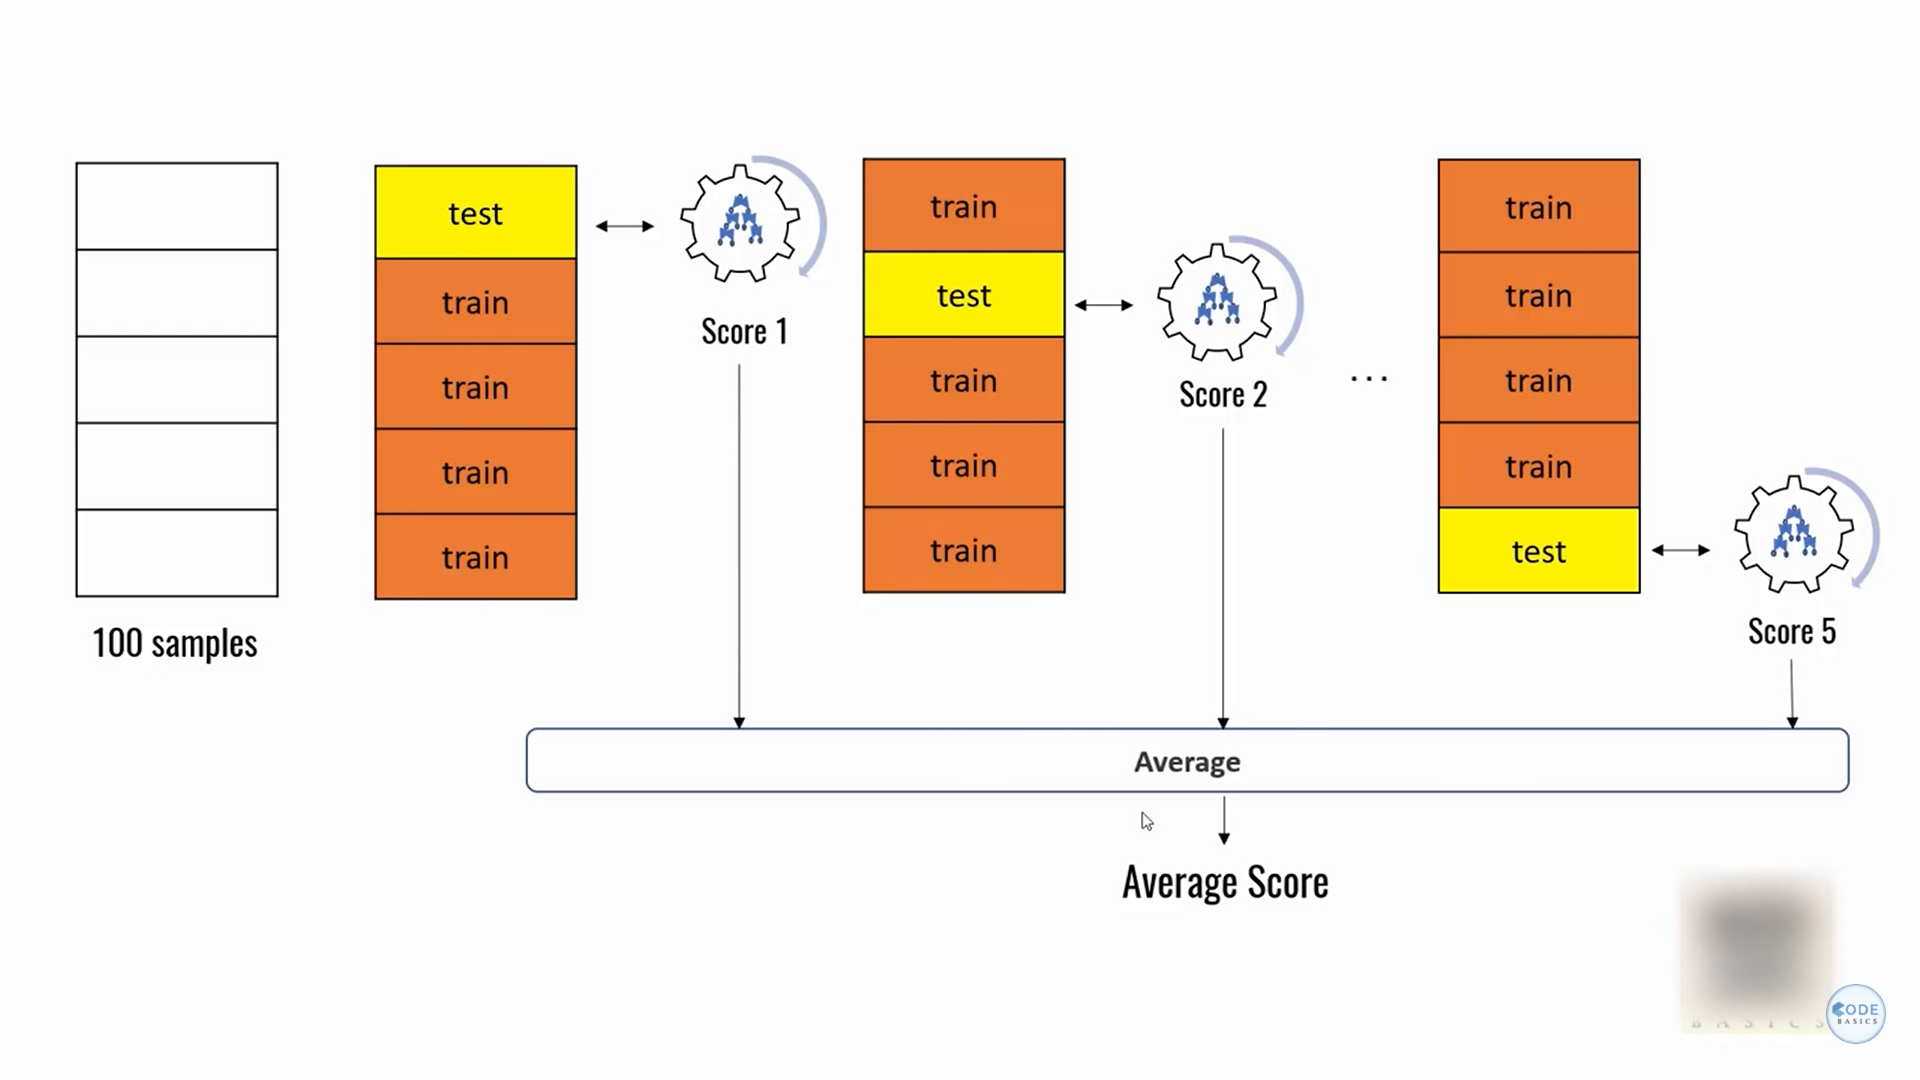

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import all training model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#import dataset
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

###     Logistic Regression
 

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9165275459098498

### SVM

In [5]:
svm=SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9814814814814815

### RandomForest

In [6]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9629629629629629

## KFold cross validation
#### Basic example

In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3) # n_splits describes :-> [No. of folds] In how many parts you want to split the dataset for train and test.
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [8]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


### Use KFold for our digits Example

In [9]:
def get_score(model, X_train, X_test, y_train, y_test):
     model.fit(X_train, y_train)
     return model.score(X_test, y_test)

In [10]:
get_score(rf,X_train, X_test, y_train, y_test)

0.9740740740740741

In [11]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)
folds

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

but but but, 
You need to know what "KFold" and "Stratified" are first.

KFold is a cross-validator that divides the dataset into k folds.

Stratified is to ensure that each fold of dataset has the same proportion of observations with a given label.

So, it means that StratifiedKFold is the improved version of KFold

In [12]:
scores_logistic = []
scores_svm = []
scores_rf = []

In [13]:
for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [14]:
scores_logistic

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]

In [15]:
scores_svm

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [16]:
scores_rf

[0.9165275459098498, 0.9549248747913188, 0.9232053422370617]

 ### cross_val_score function


In [17]:
from sklearn.model_selection import cross_val_score

#### Logistic regression model performance using cross_val_score

In [18]:
scores_rf_cvc=cross_val_score(LogisticRegression(), digits.data, digits.target,cv=3)
np.average(scores_rf_cvc)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9265442404006677

#### svm model performance using cross_val_score

In [19]:
scores_svm_cvc=cross_val_score(SVC(), digits.data, digits.target,cv=3)

#### random forest performance using cross_val_score



In [20]:
scores_rf_cvc=cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)